In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
"""Generic Dataset class"""
#Reusing thesame class use in assigment 1
class Dataset:
    def __init__(self, X: np.array , Y: np.array):
        self.X = X
        self.Y = Y
    
    def mean_norm(self):
        x_min, x_max = np.min(self.X), np.max(self.X)
        y_min, y_max = np.min(self.Y), np.max(self.Y) 
        range_x = x_max - x_min
        range_y = y_max - y_min
        mean_x = np.mean(self.X)
        mean_y = np.mean(self.Y)
        self.X = (self.X-mean_x)/range_x
        self.Y = (self.Y-mean_y)/range_y

    def feature_scaling(self):
        max_x = np.max(self.X)
        max_y = np.max(self.Y)
        self.X = self.X / max_x
        self.y = self.Y / max_y


In [5]:
raw = pd.read_csv("dataset-1.csv", header=0)
raw.head()

,mark1,mark2,accepted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [6]:

marks = raw.to_numpy()[:,0:2]
accepted =raw.to_numpy()[:,2].reshape((-1,1))
print(f'The shape of marks is {np.shape(marks)}')
print(f'The shape of accepted is {np.shape(accepted)}')

The shape of marks is (100, 2)
The shape of accepted is (100, 1)


In [31]:
'''plotting functions'''

def plot_acceptance(X, acceptance):
    plt.scatter(X[:, 0], X[:, 1], c=acceptance, cmap='cool')

def plot_boundary(model):
    x_min, x_max = x[:, 0].min() , x[:, 0].max() 
    y_min, y_max = x[:, 1].min() , x[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200),
                     np.linspace(y_min, y_max, 200))
    xxr = xx.ravel()
    yyr = yy.ravel()

    powers_x = []
    powers_y = []
    for i in range(1,7):
        for j in reversed(range(i+1)):
            powers_x.append(j)
    for i in range(1,7):
        for j in range(i+1):
            powers_y.append(j)
    mesh = np.zeros((len(xxr), 27))  
    for i in range(len(powers_x)):
        mesh[:,i] = xxr**powers_x[i]*yyr**powers_y[i]
    Z = model.predict_new(mesh)
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, cmap='winter')    




Text(0, 0.5, 'mark 2')

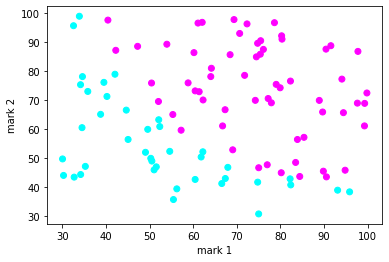

In [11]:
plot_acceptance(marks, accepted)
plt.xlabel('mark 1')
plt.ylabel('mark 2')

In [12]:

class logistic_regression:
    def __init__(self, data: Dataset, learning_rate, regularization = False, p_lambda = None):
        self.p_lambda = p_lambda
        self.regularization = regularization
        self.X = dataset.X
        self.Y = dataset.Y
        self.m = len(self.Y)
        #add x0 = 0
        self.Xmat = np.concatenate([np.ones((self.m, 1)), self.X], axis=1)
        #initialize theta vector with random numbers
        self.theta = np.random.rand(np.shape(self.X)[1]+1,1)
        self.learning_rate = learning_rate
        self.hx = 1/(1+np.exp(-self.Xmat@self.theta))
        #e = 0.0000000001
        #self.cost = -(1/self.m)*np.sum(self.Y *np.log(self.hx) + (1-self.Y)*np.log(1-self.hx+e))
        self.cost = -(1/self.m)*np.sum(self.Y *np.log(self.hx) + (1-self.Y)*np.log(1-self.hx))
        if self.regularization == True:
            self.cost += (self.p_lambda/(2*self.m))*np.sum(self.theta**2)

    def train(self):
        self.grad = self.Xmat.T@ (self.hx - self.Y)        

    def update(self):

        if self.regularization == True:
            self.theta = self.theta*(1-self.learning_rate*(self.p_lambda/self.m)) - (self.learning_rate/self.m)*self.grad
            '''we need to add theta_0 alpha(lambda/m) in order to cancel the regularization term in theta_0'''
            self.theta[0,0] += self.theta[0,0]*self.learning_rate*(self.p_lambda/self.m)
        else:
            self.theta = self.theta - (self.learning_rate/self.m)*self.grad

        self.hx = 1/(1+np.exp(-self.Xmat@self.theta))
        self.cost = -(1/self.m)*np.sum(self.Y *np.log(self.hx) + (1-self.Y)*np.log(1-self.hx))
        if self.regularization == True:
            self.cost += (self.learning_rate/(2*self.m))*np.sum(self.theta**2)

    def predict(self):
        #round no nearest integer 0 or 1
        return np.rint(1/(1+np.exp(-self.Xmat@self.theta))) 
    def predict_new(self, new_X):
        new_Xmat = np.concatenate([np.ones((np.shape(new_X)[0], 1)), new_X], axis=1)
        return np.rint(1/(1+np.exp(-new_Xmat@self.theta)))




To apply regularization the cost function turns;

$$J(\theta) = [\frac{1}{m} \sum_{i=m}^m y^{(i)}log(h_\theta(x^{(i)}) + (1- y^{(i)})log(1-h_\theta(x^{(i)}) ] + \frac{\lambda}{2m}\sum _{j=1}^n\theta_j^2$$

The regularization term in a matrix representation can be written as:
$$\frac{\lambda}{2m}\sum _{j=1}^n\theta_j^2 = \frac{\lambda}{2m}\theta^T \theta$$

The update function for $\theta_j$ $\forall i>0$ becomes:

$$\theta_j := \theta_j(1-\alpha\frac{\lambda}{m}) - \alpha\frac{\lambda}{m} \sum_{i=1}^m h_\theta(x^{(i)} -y^{(i)})x^{(i)} $$

and for $\theta_0$

$$\theta_0 := \theta_0 - \alpha\frac{\lambda}{m} \sum_{i=1}^m h_\theta(x^{(i)} -y^{(i)})x^{(i)} $$




In [13]:
'''Dataset 1'''

dataset = Dataset(marks, accepted)
'''It is necesary to do feature scaling, i.e divide X by 100, because the X values are too big, causing h(x) to approximate 1, therefore log(1-h(x)) is undefined and gives NaN
- another solution could be to initialize some thetas with negative numbers
- or adding an epsilon 
'''
dataset.feature_scaling()

In [14]:
model = logistic_regression(dataset, 0.01)

Text(0.5, 1.0, 'Cost')

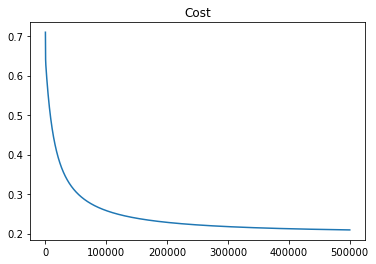

In [15]:
'''Training Loop'''

error= []
error.append(model.cost)
for i in range(500000):
    model.train()
    model.update()
    error.append(model.cost)
plt.plot(error)
plt.title('Cost')

Text(0.5, 1.0, 'Model prediction for dataset 1, post training')

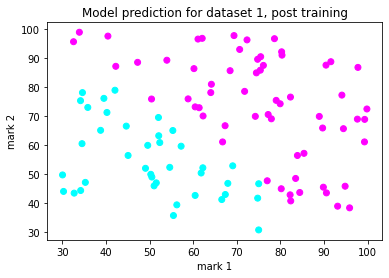

In [16]:
plot_acceptance(marks, model.predict())
plt.xlabel('mark 1')
plt.ylabel('mark 2')
plt.title('Model prediction for dataset 1, post training')

Text(0, 0.5, 'mark 2')

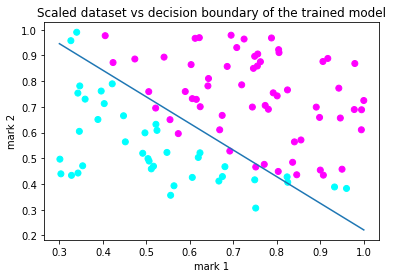

In [17]:
x = np.linspace(0.3,1,1000)
y = -(model.theta[1,0]*x+model.theta[0,0])/model.theta[2,0]

plt.plot(x,y)
plot_acceptance(marks/np.max(marks), accepted)
plt.title('Scaled dataset vs decision boundary of the trained model')
plt.xlabel('mark 1')
plt.ylabel('mark 2')

In [18]:
'''dataset 2'''
raw2 = pd.read_csv("dataset-2.csv", header=0)
raw2.head()

,test1,test2,accepted
0,0.051267,0.69956,1
1,-0.092742,0.68494,1
2,-0.213710,0.69225,1
3,-0.375000,0.50219,1
4,-0.513250,0.46564,1


The shape of tests is (118, 2)
The shape of accepted is (118, 1)


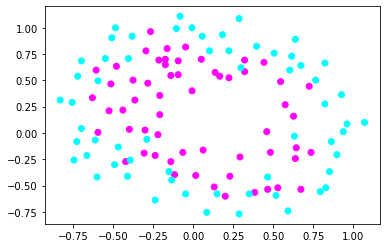

In [19]:
tests = raw2.to_numpy()[:,0:2]
accepted =raw2.to_numpy()[:,2].reshape((-1,1))
print(f'The shape of tests is {np.shape(tests)}')
print(f'The shape of accepted is {np.shape(accepted)}')

plot_acceptance(tests, accepted)

In [20]:
'''First we try the non modified dataset 2 to prove that it doest work'''
dataset = Dataset(tests,accepted)
model = logistic_regression(dataset, 0.01)


Text(0.5, 1.0, 'Cost')

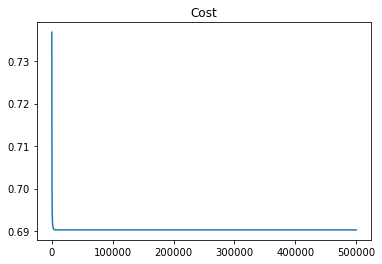

In [21]:
'''Training Loop'''
error= []
error.append(model.cost)
for i in range(500000):
    model.train()
    model.update()
    error.append(model.cost)
plt.plot(error)
plt.title('Cost')

"we can clearly see that the model doesn't work becouse the decision boundary is not linear"

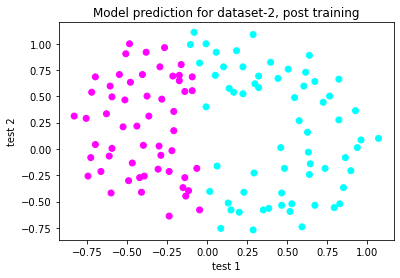

In [22]:
plot_acceptance(tests, model.predict())
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.title('Model prediction for dataset-2, post training')

'''we can clearly see that the model doesn't work becouse the decision boundary is not linear'''

In [23]:
'''Dataset 2 modified'''
'''Now we do the same, but for the modified dataset'''

raw3 = pd.read_csv("dataset-2-modified.csv", header=None)
raw3.head()


,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,1,0.051267,0.69956,0.002628,0.035864,0.489384,0.000135,0.001839,0.025089,0.342354,...,0.000900,0.012278,0.167542,1.815630e-08,2.477505e-07,0.000003,0.000046,0.000629,0.008589,0.117206
1,1,-0.092742,0.68494,0.008601,-0.063523,0.469143,-0.000798,0.005891,-0.043509,0.321335,...,0.002764,-0.020412,0.150752,6.362953e-07,-4.699318e-06,0.000035,-0.000256,0.001893,-0.013981,0.103256
2,1,-0.213710,0.69225,0.045672,-0.147941,0.479210,-0.009761,0.031616,-0.102412,0.331733,...,0.015151,-0.049077,0.158970,9.526844e-05,-3.085938e-04,0.001000,-0.003238,0.010488,-0.033973,0.110047
3,1,-0.375000,0.50219,0.140625,-0.188321,0.252195,-0.052734,0.070620,-0.094573,0.126650,...,0.017810,-0.023851,0.031940,2.780914e-03,-3.724126e-03,0.004987,-0.006679,0.008944,-0.011978,0.016040
4,1,-0.513250,0.46564,0.263426,-0.238990,0.216821,-0.135203,0.122661,-0.111283,0.100960,...,0.026596,-0.024128,0.021890,1.827990e-02,-1.658422e-02,0.015046,-0.013650,0.012384,-0.011235,0.010193


In [24]:
x = raw3.to_numpy()[:,1:] #remove the first column of 1, to be consistent, and because the model adds it later
accepted =raw2.to_numpy()[:,2].reshape((-1,1))
print(f'The shape of x is {np.shape(x)}')
print(f'The shape of accepted is {np.shape(accepted)}')

The shape of x is (118, 27)
The shape of accepted is (118, 1)


Text(0.5, 1.0, 'Cost')

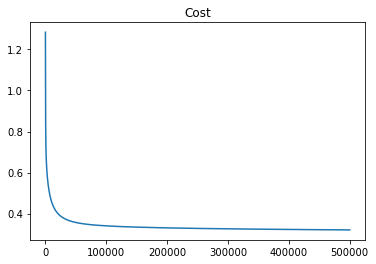

In [25]:
''' model without regularization '''
dataset = Dataset(x,accepted)
model = logistic_regression(dataset, 0.01)
error= []
error.append(model.cost)
for i in range(500000):
    model.train()
    model.update()
    error.append(model.cost)
plt.plot(error)
plt.title('Cost')


Text(0.5, 1.0, 'Model prediction for dataset-2-modified, post training \n Without regularization')

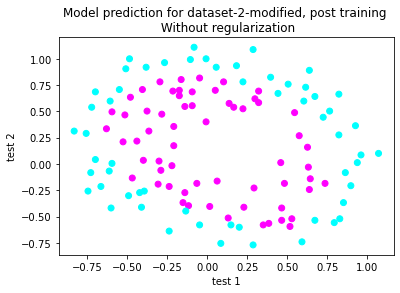

In [26]:
plot_acceptance(tests, model.predict())
plt.xlabel('test 1')
plt.ylabel('test 2')
plt.title('Model prediction for dataset-2-modified, post training \n Without regularization')

Text(0, 0.5, 'test2')

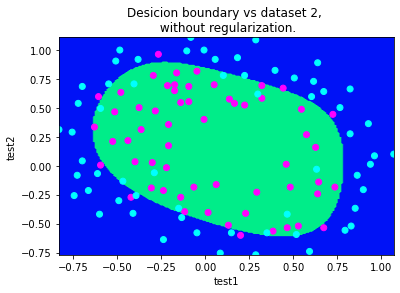

In [34]:
plot_boundary(model)
plot_acceptance(tests, accepted)
plt.title("Desicion boundary vs dataset 2, \n without regularization.")
plt.xlabel('test1')
plt.ylabel('test2')

Text(0, 0.5, 'test2')

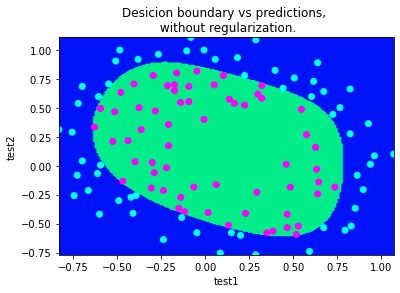

In [36]:
plot_boundary(model)
plot_acceptance(tests, model.predict())
plt.title("Desicion boundary vs predictions, \n without regularization.")
plt.xlabel('test1')
plt.ylabel('test2')

'''We can see that the desicion boundari works!!'''

Text(0.5, 1.0, 'Cost')

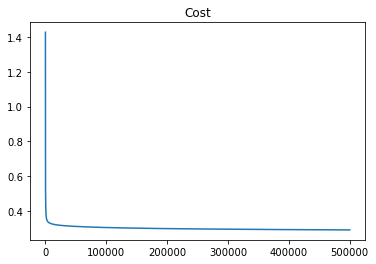

In [42]:
'''model with OVERFITTING No rgularization'''

dataset = Dataset(x,accepted)
model = logistic_regression(dataset, 0.3)
error= []
error.append(model.cost)
for i in range(500000):
    model.train()
    model.update()
    error.append(model.cost)
plt.plot(error)
plt.title('Cost')

Text(0, 0.5, 'test2')

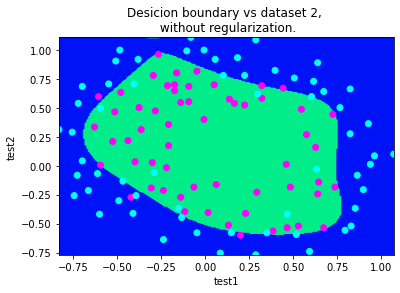

In [44]:
plot_boundary(model)
plot_acceptance(tests, accepted)
plt.title("Desicion boundary vs dataset 2, \n without regularization.")
plt.xlabel('test1')
plt.ylabel('test2')

Text(0.5, 1.0, 'Cost')

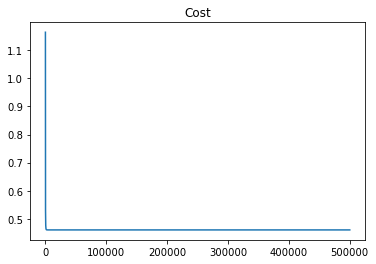

In [45]:
''' model with regularization '''
dataset = Dataset(x,accepted)
model = logistic_regression(dataset, 0.3, regularization = True, p_lambda=0.5)
error= []
error.append(model.cost)
for i in range(500000):
    model.train()
    model.update()
    error.append(model.cost)
plt.plot(error)
plt.title('Cost')


Text(0.5, 1.0, 'Model prediction for dataset-2-modified, post training \n With regularization, lambda = 0.1')

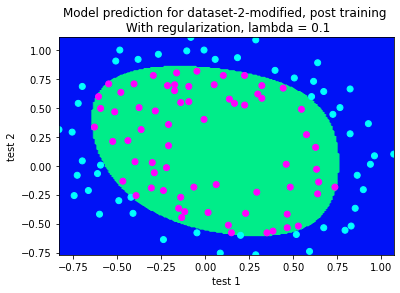

In [46]:
plot_boundary(model)
plot_acceptance(tests, model.predict())

plt.xlabel('test 1')
plt.ylabel('test 2')
plt.title('Model prediction for dataset-2-modified, post training \n With regularization, lambda = 0.1')

Text(0, 0.5, 'test2')

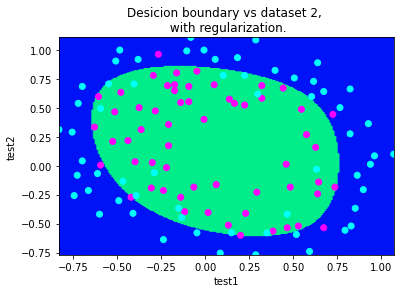

In [47]:
plot_boundary(model)
plot_acceptance(tests, accepted)
plt.title("Desicion boundary vs dataset 2, \n with regularization.")
plt.xlabel('test1')
plt.ylabel('test2')